In [48]:
import numpy as np
import math

In [5]:
sub_path = "/home/xeinia/Documents/bastra74/One_medium_simple_geometries/1_group/SLub/"
file_name_zero = "/result_flux0.txt"
file_name_1 = "/result_flux1.txt"
file_name_2 = "/result_flux2.txt"
file_name_3 = "/result_flux3.txt"
file_name_4 = "/result_flux4.txt"

names_measurings = [file_name_zero, file_name_1, file_name_2, file_name_3, file_name_4]

In [49]:
def get_flux_from_file(file_name):
    
    count = 0
    lines = []
    
    with open(file_name) as fp:
        for line in fp:
            count += 1
            lines.append(line)

    line_array = []
    for line in lines:
        line_array.append(line.split())
        
    flux_sample  = []

    for line in line_array:
        flux_sample.append(float(line[1]))
    
    return flux_sample

In [50]:
def merge_flux_files(files):
    
    merged_flux = []
    for file in files:
        k_effective_values = get_flux_from_file(file)
        merged_flux.extend(k_effective_values)
        
    return merged_flux

In [51]:
def get_flux_value(sub_path, file_name, idx_start, idx_end):
    
    merged_flux = []
    for i in range(idx_start, idx_end):
        if i == 11:
            continue
        
        if i == 31:
            continue
        result_name = sub_path + str(i) + file_name
        
        current_flux = get_flux_from_file(result_name)
        current_flux = current_flux[10: len(current_flux) - 1]
        merged_flux.extend(current_flux)
        
    return merged_flux

In [52]:
def get_std(values):
    
    current_std = np.std(values)/np.sqrt((len(values) - 1.))
  
    return current_std   

In [53]:
def get_collision_sum(sub_path, file_names, idx_start, idx_end):

    result_fluxes = []
    result_std = []
    for name in file_names:
        result_flux = get_flux_value(sub_path, name, idx_start, idx_end)      
        result_fluxes.append(result_flux)
        
    return result_fluxes

In [11]:
collision_sum = get_collision_sum(sub_path, names_measurings, 1, 51)

In [54]:
def get_normalise_flux(collisions_sum):
    
    average_number_of_collision = []
    for i in range(0, len(collisions_sum)):
        average_number_of_collision.append((sum(collisions_sum[i])) / len(collisions_sum[i]))        
    
    zero_point = average_number_of_collision[0]
    
    result_flux = []
    for i in range(1, len(average_number_of_collision)):
        result_flux.append(average_number_of_collision[i] / zero_point)
        
    result_flux[-1] = result_flux[-1] /0.05
    
    result_std = []
    for i in range(0, len(collisions_sum)):
        current_std = get_std(collisions_sum[i])
        result_std.append(current_std)  
        
    return result_flux, result_std, zero_point
    

In [13]:
result_flux, result_std, zero_point = get_normalise_flux(collision_sum)

In [14]:
print(result_flux)


print(result_std)


[0.9701304390913263, 0.8809608470456908, 0.7311267711400314, 0.4990775885893241]
[2.4815311167522185e-05, 2.478937022408898e-05, 2.3745948009004587e-05, 2.16581903512914e-05, 3.466112279880356e-06]


In [15]:
flux_slub = [0.9701734, 0.8810540, 0.7318131, 0.4902592]


# In[47]:


for i in range(0, len(flux_slub)):
    print(str(((flux_slub[i] - result_flux[i])/flux_slub[i])* 100) + " %  " + str(result_std[i] * 100000))

0.004428168064968296 %  2.4815311167522185
0.010572899539554668 %  2.478937022408898
0.09378471907219954 %  2.374594800900459
-1.7987196546896214 %  2.16581903512914


In [22]:
def multiply_flux_on_range(input_flux, epsilon, border, radius):
    
    normalised_flux = []
    for i in range(0, len(input_flux) - 1):
        result_flux = input_flux[i] * ( 2. * epsilon / radius)       
        normalised_flux.append(result_flux)
    
    result_flux = input_flux[-1] * ( border /radius) 
    normalised_flux.append(result_flux)
    
    return normalised_flux

In [23]:
print(result_flux)

[0.9701304390913263, 0.8809608470456908, 0.7311267711400314, 0.4990775885893241]


In [34]:
result_flux = [1., 0.9701304390913263, 0.8809608470456908, 0.7311267711400314, 0.4990775885893241]

In [35]:
epsilon = 0.2
radius = 2.256751
border = 0.02

In [36]:
normalized_flux = multiply_flux_on_range(result_flux, epsilon, border, radius)

In [37]:
print(normalized_flux)

[0.17724596111843977, 0.17195170208699612, 0.15614675204232828, 0.12958926725013642, 0.0044229743431094]


In [38]:
import numpy as np

from scipy.interpolate import Rbf, InterpolatedUnivariateSpline

import matplotlib.pyplot as plt


flux_points = [0., 0.25, 0.5, 0.75, 1.]

flux_values = [1., 0.9701734, 0.8810540, 0.7318131, 0.4902592]

In [39]:
def calculate_int_values(points, flux_values, epsilon, border, radius):
    
    ius = InterpolatedUnivariateSpline(flux_points, flux_values)
    result_ints = []
    for i in range(1, len(points) - 1):
        first_point = points[i]  - epsilon / radius
        secound_point = points[i]  + epsilon / radius
        range_sum = ius.integral(first_point, secound_point)
        result_ints.append(range_sum)
        
    border_sum = ius.integral(1. - border / radius, 1.)
    result_ints.append(border_sum)
    
    return result_ints

In [40]:
int_sum = calculate_int_values(flux_points, flux_values, epsilon, border, radius)

In [47]:
print(int_sum)

[0.17173920674972554, 0.1559614448121684, 0.1293682268858979, 0.004391867996426392]


In [51]:
(0.17175 - 0.171739)/0.171739

6.405068155754372e-05

In [48]:
print(normalized_flux)

[0.17724596111843977, 0.17195170208699612, 0.15614675204232828, 0.12958926725013642, 0.0044229743431094]


In [49]:
for i in range(0, len(normalized_flux)):
    relative_difference = ((int_sum[i] - normalized_flux[i + 1])/ int_sum[i]) * 100
    
    print("i === " + str(i) + str("  ") + str(relative_difference))

i === 0  -0.1237314072262181
i === 1  -0.11881605122539159
i === 2  -0.17086140048395543
i === 3  -0.7082714395860493


IndexError: list index out of range

In [42]:
flux_slub = [0.9701734, 1.0, 0.9701734, 0.881054, 0.7318131, 0.4902592]
flux_points = [0, 0.25, 0.5, 0.75, 1]
flux_points_1 = [-0.25, 0, 0.25, 0.5, 0.75, 1]
import matplotlib.pyplot as plt

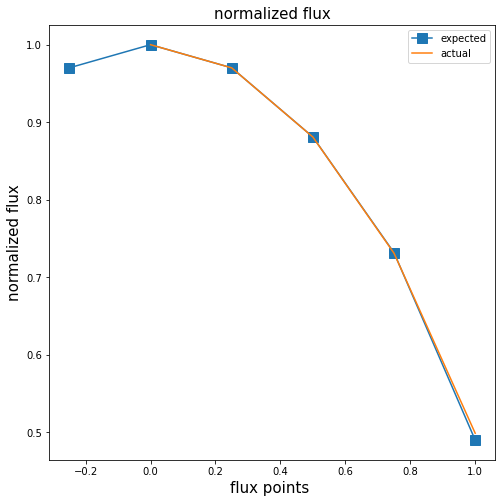

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title("normalized flux", fontsize = 15)
plt.xlabel("flux points ", fontsize = 15)
plt.ylabel("normalized flux", fontsize = 15)


plt.plot(flux_points_1, flux_slub, marker = 's', markersize=10, label="expected")
plt.plot(flux_points, result_flux, label="actual")
plt.legend()

In [56]:
sub_path = "/home/xeinia/Documents/bastra74/One_medium_simple_geometries/1_group/Cylinder/"
file_name_zero = "/result_flux.txt0.txt"
file_name_1 = "/result_flux.txt1.txt"
file_name_2 = "/result_flux.txt2.txt"

names_measurings = [file_name_zero, file_name_1, file_name_2]

In [57]:
collision_sum = get_collision_sum(sub_path, names_measurings, 1, 25)

In [14]:
def get_average_number_of_collision(collisions):
    
    average_number_of_collision = []
    for i in range(0, len(collisions)):

        average_number_of_collision.append((sum(collisions[i])) / len(collisions[i]))        
            
    return average_number_of_collision

In [ ]:
average_sum_of_collision = get_average_number_of_collision(collision_sum)

In [60]:
def divide_estimators_square(average_number_of_collision, radius, epsilon):
    average_number_of_collision[0] /= np.pi * epsilon * epsilon
    
    average_number_of_collision[1] /= np.pi * ((radius * 0.5 + epsilon) * (radius * 0.5 + epsilon) -
                                            (radius * 0.5 - epsilon) * (radius * 0.5 - epsilon))
    
    average_number_of_collision[2] /= np.pi * ((radius) * (radius) -
                                            (radius - 0.1) * (radius - 0.1))
    
    
    
    result_estimators = [ average_number_of_collision[1]/
                         average_number_of_collision[0], average_number_of_collision[2]/ average_number_of_collision[0]]
    
    return result_estimators, average_number_of_collision[0]

In [61]:
normalise_flux, zero_point = divide_estimators_square(average_sum_of_collision, 4.279960, 0.2)

In [63]:
   
result_std = []
for i in range(0, len(collision_sum)):
    current_std = get_std(collision_sum[i])
    result_std.append(current_std)  


In [67]:
normalise_flux

[0.8085557712596925, 0.3141866499389094]

In [66]:
test_flux = [0.8093, 0.2926]


# In[65]:


for i in range(0, len(test_flux)):
    print(str(((normalise_flux[i] - test_flux[i])/test_flux[i] )* 100) + " % " + str(result_std[i + 1] * 100000))


-0.09195956262295205 % 3.801530838942063
7.377529029018917 % 1.5173662507588488


In [73]:
def get_fluxes_cylinder(sub_path, file_names, idx_start, idx_end, radius, epsilon, border):
    print(" sub_path "+ str(sub_path))
    
    result_fluxes = []
    result_std = []
    i = 0
    zero_value = 0.
    for name in file_names:
        result_flux = get_flux_value(sub_path, name, idx_start, idx_end)
        normalise_flux = np.array(result_flux)
        if i == 0:
            normalise_flux = normalise_flux / (np.pi * epsilon * epsilon)
            zero_value = normalise_flux
            
        if i == 1:
            normalise_flux = normalise_flux / (np.pi * ((radius * 0.5 + epsilon) * (radius * 0.5 + epsilon) -
                                            (radius * 0.5 - epsilon) * (radius * 0.5 - epsilon)))
            normalise_flux = normalise_flux / zero_value
            
        if i == 2:
            normalise_flux = normalise_flux / (np.pi * ((radius) * (radius) -
                                            (radius - border) * (radius - border)))
            normalise_flux = normalise_flux / zero_value
        i = i + 1
                
            
            
        current_std = get_std(normalise_flux)
        print("current std  "+ str(current_std * 100000) )
        result_std.append(current_std)
        result_fluxes.append(sum(normalise_flux)/ len(normalise_flux))
        
    return result_fluxes, result_std   

In [74]:
radius = 4.279960
epsilon = 0.05
border = 0.1

In [76]:
zero_point = get_flux_value(sub_path, file_name_zero, 1, 25)
zero_point = sum(zero_point) / len(zero_point)

In [77]:
result_fluxes, result_std = get_fluxes_cylinder(sub_path, names_measurings, 1, 25, radius, epsilon, border)

 sub_path /home/xeinia/Documents/bastra74/One_medium_simple_geometries/1_group/Cylinder/
current std  76.34719419259567
current std  8.401361231118065
current std  1.7273347528743053


In [78]:
flux_points = [0., 0.5, 1.]

In [79]:
from scipy.interpolate import interp1d

import scipy.integrate as integrate

In [80]:
test_flux = [1, 0.8093, 0.2926]

In [81]:
print(flux_points)
print(test_flux)

[0.0, 0.5, 1.0]
[1, 0.8093, 0.2926]


In [82]:
ius = interp1d(flux_points, test_flux)
result_ints = []
for i in range(1, len(flux_points) - 1):
    first_point = flux_points[i]  - epsilon / radius
    secound_point = flux_points[i]  + epsilon / radius
    result = integrate.quad(ius, first_point, secound_point)
    result_ints.append(result)

border_sum = integrate.quad(ius, 1. - border / radius, 1.)
result_ints.append(border_sum)

In [83]:
print(result_ints)

[(0.01886456360797864, 2.0944075466988732e-16), (0.003488774093297849, 3.873317326095026e-17)]


In [84]:
int_flux = [0.01886456360797864, 0.003488774093297849]

In [85]:
first = result_fluxes[0] * ( 2. * epsilon / radius)
secound = result_fluxes[1] * ( border /radius)

In [9]:
sub_path = "/home/xeinia/Documents/bastra74/One_medium_simple_geometries/1_group/Sphere/"
file_name_zero = "/result_flux.txt0.txt"
file_name_1 = "/result_flux.txt1.txt"
file_name_2 = "/result_flux.txt2.txt"
file_name_3 = "/result_flux.txt3.txt"
file_name_4 = "/result_flux.txt4.txt"

names_measurings = [file_name_zero, file_name_1, file_name_2, file_name_3, file_name_4]

In [10]:
collision_sum = get_collision_sum(sub_path, names_measurings, 1, 50)

In [15]:
def divide_estimators_square(average_number_of_collision, radius, epsilon):
    
    average_number_of_collision[0] /= np.pi * 4/3 * 0.1 * 0.1 * 0.1
    
    average_number_of_collision[1] /= np.pi * 4/3 * ((radius * 0.25 + epsilon) * (radius * 0.25 + epsilon) * (radius * 0.25 + epsilon) -
                                (radius * 0.25 - epsilon) * (radius * 0.25 - epsilon)* (radius * 0.25 - epsilon))
    
    average_number_of_collision[2] /= np.pi * 4/3 * ((radius * 0.5 + epsilon) * (radius * 0.5 + epsilon) * (radius * 0.5 + epsilon) -
                                (radius * 0.5 - epsilon) * (radius * 0.5 - epsilon)* (radius * 0.5 - epsilon))
    
    average_number_of_collision[3] /= np.pi * 4/3 * ((radius * 0.75 + epsilon) * (radius * 0.75 + epsilon) * (radius * 0.75 + epsilon) -
                                (radius * 0.75 - epsilon) * (radius * 0.75 - epsilon)* (radius * 0.75 - epsilon))
    
    average_number_of_collision[4] /= np.pi * 4/3 * ((radius) * (radius) * (radius) -
                                            (radius - 0.05) * (radius - 0.05) * (radius - 0.05))
    
    
    
    result_estimators = [ average_number_of_collision[1]/average_number_of_collision[0], 
                         average_number_of_collision[2]/ average_number_of_collision[0],
                        average_number_of_collision[3]/ average_number_of_collision[0],
                        average_number_of_collision[4]/ average_number_of_collision[0]]
    
    return result_estimators   


In [16]:
average_sum_of_collision = get_average_number_of_collision(collision_sum)

In [17]:
flux_sphere = divide_estimators_square(average_sum_of_collision, 6.082547, 0.05)


In [23]:
test_flux = [0.93538006, 0.75575352, 0.49884364, 0.19222603]

for i in range(0, len(test_flux)):
    print(str(((flux_sphere[i] - test_flux[i])/test_flux[i] )* 100) + " % ")



0.6591005711721616 % 
0.6578057455777834 % 
0.6583029107311942 % 
4.86502211931066 % 


In [24]:
def get_flux_value(sub_path, file_name, idx_start, idx_end):
    
    merged_flux = []
    for i in range(idx_start, idx_end):
        if i == 11:
            continue
        
        if i == 31:
            continue
        result_name = sub_path + str(i) + file_name
        
        current_flux = get_flux_from_file(result_name)
        current_flux = current_flux[10: len(current_flux) - 1]
        merged_flux.extend(current_flux)
        
    return merged_flux

In [25]:
sub_path = "/home/xeinia/Documents/bastra74/One_medium_simple_geometries/1_group/Sphere/"
file_name_zero = "/result_flux.txt0.txt"
file_name_1 = "/result_flux.txt1.txt"
file_name_2 = "/result_flux.txt2.txt"
file_name_3 = "/result_flux.txt3.txt"
file_name_4 = "/result_flux.txt4.txt"

names_measurings = [file_name_zero, file_name_1, file_name_2, file_name_3, file_name_4]

In [26]:
zero_point = get_flux_value(sub_path, file_name_zero, 1, 51)
zero_point = sum(zero_point) / len(zero_point)

In [27]:
def get_fluxes_sphere(sub_path, file_names, idx_start, idx_end, radius, zenter, epsilon, border):
    
    result_fluxes = []
    result_std = []
    i = 0
    zero_value = 0.

    result_flux = get_flux_value(sub_path, file_names[0], idx_start, idx_end)
    normalise_flux = np.array(result_flux)
    normalise_flux = normalise_flux / (np.pi * 4/3 * zenter * zenter * zenter)
    zero_value = sum(normalise_flux)/ len(normalise_flux)
    
    current_std = get_std(normalise_flux)
    result_std.append(current_std)
    result_fluxes.append(sum(normalise_flux)/ len(normalise_flux))
    
    
    result_flux = get_flux_value(sub_path, file_names[1], idx_start, idx_end)
    normalise_flux = np.array(result_flux)
    normalise_flux = normalise_flux / (np.pi * 4/3 * ((radius * 0.25 + epsilon) * (radius * 0.25 + epsilon) * (radius * 0.25 + epsilon) -
                                (radius * 0.25 - epsilon) * (radius * 0.25 - epsilon)* (radius * 0.25 - epsilon)))
    normalise_flux = normalise_flux / zero_value
    
    current_std = get_std(normalise_flux)
    result_std.append(current_std)
    result_fluxes.append(sum(normalise_flux)/ len(normalise_flux))
    
    
    result_flux = get_flux_value(sub_path, file_names[2], idx_start, idx_end)
    normalise_flux = np.array(result_flux)
    normalise_flux = normalise_flux / (np.pi * 4/3 * ((radius * 0.5 + epsilon) * (radius * 0.5 + epsilon) * (radius * 0.5 + epsilon) -
                                (radius * 0.5 - epsilon) * (radius * 0.5 - epsilon)* (radius * 0.5 - epsilon)))
    normalise_flux = normalise_flux / zero_value
    
    current_std = get_std(normalise_flux)
    result_std.append(current_std)
    result_fluxes.append(sum(normalise_flux)/ len(normalise_flux))
    
    
    result_flux = get_flux_value(sub_path, file_names[3], idx_start, idx_end)
    normalise_flux = np.array(result_flux)
    normalise_flux = normalise_flux / (np.pi * 4/3 * ((radius * 0.75 + epsilon) * (radius * 0.75 + epsilon) * (radius * 0.75 + epsilon) -
                                (radius * 0.75 - epsilon) * (radius * 0.75 - epsilon)* (radius * 0.75 - epsilon)))
    normalise_flux = normalise_flux / zero_value
    
    current_std = get_std(normalise_flux)
    result_std.append(current_std)
    result_fluxes.append(sum(normalise_flux)/ len(normalise_flux))
    
    result_flux = get_flux_value(sub_path, file_names[4], idx_start, idx_end)
    normalise_flux = np.array(result_flux)
    normalise_flux = normalise_flux / (np.pi * 4/3 * ((radius) * (radius) * (radius) -
                                            (radius - border) * (radius - border) * (radius - border)))
    normalise_flux = normalise_flux / zero_value
    
    current_std = get_std(normalise_flux)
    result_std.append(current_std)
    result_fluxes.append(sum(normalise_flux)/ len(normalise_flux))
    
    
    
    return result_fluxes, result_std   

In [28]:
result_fluxes, result_std = get_fluxes_sphere(sub_path, names_measurings, 1, 51, 6.082547, 0.1, 0.05, 0.05)

In [29]:
import numpy as np

from scipy.interpolate import Rbf, InterpolatedUnivariateSpline

import matplotlib.pyplot as plt

In [30]:
def calculate_int_values(input_points, flux_values, epsilon, border, radius):
    
    print(input_points)
    print(flux_values)
    ius = InterpolatedUnivariateSpline(input_points, flux_values)
    result_ints = []
    for i in range(1, len(input_points) - 1):
        
        first_point = input_points[i]  - epsilon / radius
        secound_point = input_points[i]  + epsilon / radius
        
        print(first_point)
        print(secound_point)

        range_sum = ius.integral(first_point, secound_point)
        result_ints.append(range_sum)
        
    border_sum = ius.integral(1. - border / radius, 1.)
    result_ints.append(border_sum)
    
    return result_ints

In [31]:
flux_points = [0, 0.25, 0.5, 0.75, 1]
epsilon = 0.05
border = 0.05
radius = 6.082547

In [32]:
result_fluxes = [1., 0.9389923093430012, 0.7586947756745532, 0.5007825909215997, 0.20098185151055478]

In [33]:
int_sum = calculate_int_values(flux_points, result_fluxes, epsilon, border, radius)

[0, 0.25, 0.5, 0.75, 1]
[1.0, 0.9389923093430012, 0.7586947756745532, 0.5007825909215997, 0.20098185151055478]
0.2417797593672519
0.25822024063274807
0.49177975936725193
0.5082202406327481
0.7417797593672519
0.7582202406327481


In [34]:
print(int_sum)

[0.015437132078952177, 0.012473081612833123, 0.008232982711015333, 0.0016939120286756032]


In [35]:
print(result_fluxes)

[1.0, 0.9389923093430012, 0.7586947756745532, 0.5007825909215997, 0.20098185151055478]


In [36]:
result_fluxes = result_fluxes[1:]

In [40]:
def multiply_flux_on_range(input_flux, epsilon, border, radius):
    
    normalised_flux = []
    for i in range(0, len(input_flux) - 1):
        result_flux = input_flux[i] * ( 2. * epsilon / radius)       
        normalised_flux.append(result_flux)
    
    result_flux = input_flux[-1] * ( border /radius) 
    normalised_flux.append(result_flux)
    
    return normalised_flux

In [41]:
normalized_flux = multiply_flux_on_range(result_fluxes, epsilon, border, radius)

In [42]:
print(normalized_flux)

[0.015437485470198608, 0.012473307245707322, 0.0082331068041332, 0.0016521191822320058]


In [45]:
print(int_sum)

[0.015437132078952177, 0.012473081612833123, 0.008232982711015333, 0.0016939120286756032]


In [43]:
for i in range(0, len(test_flux)):
    print(str(((normalized_flux[i] - int_sum[i])/int_sum[i] )* 100) + " % " )

0.0022892286250030263 % 
0.0018089585332834873 % 
0.0015072680488016745 % 
-2.4672383061281784 % 


In [44]:
flux_points_1 = [-0.25, 0, 0.25, 0.5, 0.75, 1]

test_flux = [0.93538006, 1., 0.93538006, 0.75575352, 0.49884364, 0.19222603]

result_fluxes = [1., 0.9389923093430012, 0.7586947756745532, 0.5007825909215997, 0.20098185151055478]

In [55]:
sub_path = "/home/xeinia/Documents/bastra74/MG_measurings_b1/reactor_flux_3/"
file_name_zero = "/result_flux0.txt"
file_name_1 = "/result_flux1.txt"
file_name_2 = "/result_flux2.txt"
file_name_3 = "/result_flux3.txt"
file_name_4 = "/result_flux4.txt"

names_measurings = [file_name_zero, file_name_1, file_name_2, file_name_3, file_name_4]

In [57]:
collision_sum = get_collision_sum(sub_path, names_measurings, 2, 40)

In [59]:
zero_estimator = collision_sum[0]

average_value = sum(zero_estimator)/len(zero_estimator)
zero_point = average_value / (0.317337461 * 0.05 *2)
print(zero_point)

13735.006863587703


In [61]:
Fe_U_estimator = collision_sum[1]

average_value = sum(Fe_U_estimator)/len(Fe_U_estimator)
average_value = average_value / ( zero_point * 0.317337461 * 0.05 * 2.)

average_array = np.array(Fe_U_estimator)
average_array = average_array / (zero_point * 0.317337461 * 0.05 * 2.)
current_std = get_std(average_array)


In [62]:
print(average_value)

1.2126250843571038


In [63]:

difference = (average_value - 1.229538) * 100000

print(" difference from beachmark [pcm]  " + str(difference) + "  with standart deviation [pcm]+- " + str(current_std * 100000))


# In[87]:

 difference from beachmark [pcm]  -1691.291564289621  with standart deviation [pcm]+- 29.7754503567894


In [65]:
(average_value - 1.229538)/1.229538 * 100

-1.3755504622790193

In [69]:
U_Fe_estimator = collision_sum[2]

start = 10
end = len(U_Fe_estimator) - 1

average_value = sum(U_Fe_estimator[start: end])/len(U_Fe_estimator[start: end])
average_value = average_value / (zero_point * 2. * 0.317337461 * 0.01)


average_array = np.array(U_Fe_estimator[start: end])
average_array = average_array / (zero_point * 2. * 0.317337461 * 0.01)
current_std = get_std(average_array)

In [74]:
U_Fe_estimator = collision_sum[3]
start = 10
end = len(U_Fe_estimator) - 1
average_value = sum(U_Fe_estimator[start: end])/len(U_Fe_estimator[start: end])
average_value = average_value / (zero_point * (5.754395005 - 5.437057544)  * 0.04)


average_array = np.array(U_Fe_estimator[start: end])
average_array = average_array / (zero_point * (5.754395005 - 5.437057544)  * 0.04)
current_std = get_std(average_array)

In [77]:
Na_estimator = collision_sum[4]

average_value = sum(Na_estimator)/len(Na_estimator)
average_value = average_value / ( zero_point * (7.757166007 -5.754395005) * 0.05)

average_array = np.array(Na_estimator)
average_array = average_array / (zero_point * (7.757166007 -5.754395005) * 0.05)
current_std = get_std(average_array)


In [78]:
print(average_value)

0.9140396721327341


In [80]:
print((average_value - 0.912273)/0.912273 * 100)

0.1936560802231427


In [ ]:

zero_estimator = estimators_result[0]

average_value = sum(zero_estimator.collision_sum)/len(zero_estimator.collision_sum)
zero_point = average_value / (0.317337461 * 0.05 *2)
print(zero_point)


# In[92]:


print(average_value)


# In[73]:


Fe_U_estimator = estimators_result[1]

average_value = sum(Fe_U_estimator.collision_sum)/len(Fe_U_estimator.collision_sum)
average_value = average_value / ( zero_point * 0.317337461 * 0.05 * 2.)

average_array = np.array(Fe_U_estimator.collision_sum)
average_array = average_array / (zero_point * 0.317337461 * 0.05 * 2.)
current_std = get_std(average_array)


# In[91]:


U_Fe_estimator = estimators_result[2]

start = 10
end = len(U_Fe_estimator.collision_sum) - 1

average_value = sum(U_Fe_estimator.collision_sum[start: end])/len(U_Fe_estimator.collision_sum[start: end])
average_value = average_value / (zero_point * 2. * 0.317337461 * 0.01)


average_array = np.array(U_Fe_estimator.collision_sum[start: end])
average_array = average_array / (zero_point * 2. * 0.317337461 * 0.01)
current_std = get_std(average_array)


# In[93]:


difference = (average_value - 1.49712) * 100000

print(" difference from beachmark [pcm]  " + str(difference) + "  with standart deviation [pcm]+- " + str(current_std * 100000))


# In[87]:


U_Fe_estimator = estimators_result[3]
start = 10
end = len(U_Fe_estimator.collision_sum) - 1
average_value = sum(U_Fe_estimator.collision_sum[start: end])/len(U_Fe_estimator.collision_sum[start: end])
average_value = average_value / (zero_point * (5.754395005 - 5.437057544)  * 0.04)


average_array = np.array(U_Fe_estimator.collision_sum[start: end])
average_array = average_array / (zero_point * (5.754395005 - 5.437057544)  * 0.04)
current_std = get_std(average_array)



difference = (average_value - 1.324899) * 100000

print(" difference from beachmark [pcm]  " + str(difference) + "  with standart deviation [pcm]+- " + str(current_std * 100000))


# In[82]:


Na_estimator = estimators_result[4]

average_value = sum(Na_estimator.collision_sum)/len(Na_estimator.collision_sum)
average_value = average_value / ( zero_point * (7.757166007 -5.754395005) * 0.05)

average_array = np.array(Na_estimator.collision_sum)
average_array = average_array / (zero_point * (7.757166007 -5.754395005) * 0.05)
current_std = get_std(average_array)


# In[83]:


difference = (average_value - 0.912273) * 100000

print(" difference from beachmark [pcm]  " + str(difference) + "  with standart deviation [pcm]+- " + str(current_std * 100000))
